<img src="life_expectancy.jpg" alt="" title="Life Expectancy" />

In [3]:
import os
import pandas as pd
import numpy as np
import IPython
import seaborn as sns

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [4]:
print(os.listdir())
os.listdir('life-expectancy-who')

['.git', '.gitattributes', '.ipynb_checkpoints', 'country-to-continent.zip', 'ife.png', 'jjj.jpeg', 'Life Expectancy Prediction.ipynb', 'life-expectancy-who', 'life-expectancy-who.zip', 'life_expectancy.html', 'life_expectancy.jpg', 'neppp.html', 'Pandas Profiling.ipynb', '__pycache__']


['countryContinent.csv', 'Life Expectancy Data.csv']

In [5]:
continent = pd.read_csv('life-expectancy-who/countryContinent.csv', skipinitialspace=True, encoding = "ISO-8859-1")

df = pd.read_csv('life-expectancy-who/Life Expectancy Data.csv', parse_dates=True)

In [6]:
continent['continent'].value_counts()

Africa      58
Americas    55
Asia        51
Europe      51
Oceania     25
Name: continent, dtype: int64

In [7]:
continent_dict = {}
for i in continent['country']:
    cont = continent[continent['country']==i]['continent']
    c = cont.values[0]
    continent_dict[i] = c

In [8]:
update = {'Republic of Korea' : 'Asia', 'Republic of Moldova' : 'Europe' ,'Democratic Republic of the Congo' : 'Africa', 'Czechia' : 'Europe', 'United Republic of Tanzania' : 'Africa', 'The former Yugoslav republic of Macedonia' : 'Europe', 'Democratic Peoples Republic of Korea' : 'Asia'}

continent_dict.update(update)

In [9]:
df['continent'] = df['Country'].copy()
df['continent'] = df['continent'].replace(continent_dict)
print(df['continent'].value_counts())
df.head()

Africa      864
Asia        752
Europe      626
Americas    530
Oceania     166
Name: continent, dtype: int64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [10]:
new_columns= []
columns = list(df.columns)
for col in list(df.columns):
    a = col.split()
    b = '_'.join(a)
    new_columns.append(b)
df.columns =new_columns


df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'continent'],
      dtype='object')

In [11]:
# Checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [12]:
#Checking the statistical information of the numerical dataset

df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


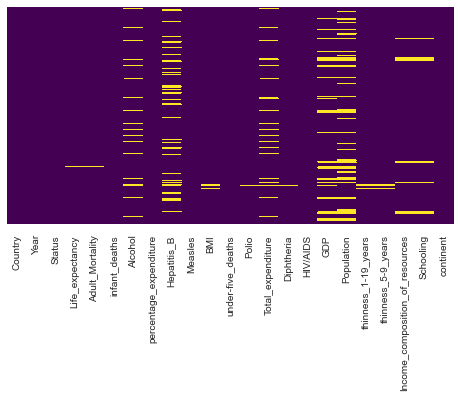

In [13]:
#Cheching the distribution of missing value in the data, where hite spaces denote missing value

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

### OOPS!!!

Even our target column (Life_expectancy) has missing values, we need to look into this.

------------------
------------------

In [14]:
df[df['Life_expectancy'].isnull()]
#df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,continent
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,Oceania
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,Americas
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,Oceania
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,Europe
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,Oceania
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,Oceania
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,Oceania
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,Americas
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,Europe
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,Oceania


These countries don't look very familiar, let's check how many times these countries appeared in the dataset.

In [15]:
df.Country.value_counts().tail(15)

Saint Vincent and the Grenadines    16
Bosnia and Herzegovina              16
Ghana                               16
Portugal                            16
Germany                             16
Cook Islands                         1
Palau                                1
Saint Kitts and Nevis                1
Nauru                                1
Niue                                 1
Monaco                               1
Dominica                             1
Marshall Islands                     1
San Marino                           1
Tuvalu                               1
Name: Country, dtype: int64

##### They appeared only ones, pheeeew! 

Well it is safe to drop them. We will be dropping them after dealing with the other missing data using interpolation.

In [16]:
col = list(df.select_dtypes(include=['int64', 'float64']).columns)
col.remove('Life_expectancy')
col.remove('Adult_Mortality')
df[col]=df[col].interpolate(axis=1)

In [17]:
df.shape

(2938, 23)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(2928, 23)

In [20]:
df.Country.value_counts(ascending=True).tail(15)

Cuba                                16
Burundi                             16
Tunisia                             16
Mexico                              16
Slovenia                            16
Grenada                             16
Liberia                             16
Thailand                            16
Micronesia (Federated States of)    16
Philippines                         16
Tonga                               16
Belarus                             16
Albania                             16
Cambodia                            16
Fiji                                16
Name: Country, dtype: int64

In [21]:
df.tail()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,continent
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.0,68.0,31.0,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.0,7.0,998.0,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.0,73.0,304.0,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.0,76.0,529.0,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa
2937,Zimbabwe,2000.0,Developing,46.0,665.0,24.0,1.68,0.0,79.0,1483.0,...,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8,Africa


In [22]:
df[['Country', 'Status']]=df[['Country', 'Status']].astype('category')

In [23]:
#report = ProfileReport(df)
#report.to_file('neppp.html')

# Graphical Exploratory Data Analysis

In [24]:
#Creating a function that check the correlation between

def heatmap(data, country):
    a = df['Country'].value_counts()
    b = list(a.index)
    assert country in b, 'country not found in dataset'
    correlation = df[df['Country']==country].corr()*100
    plt.figure(figsize=(12,7))
    sns.heatmap(correlation, annot = True, cbar=False, cmap = 'viridis')

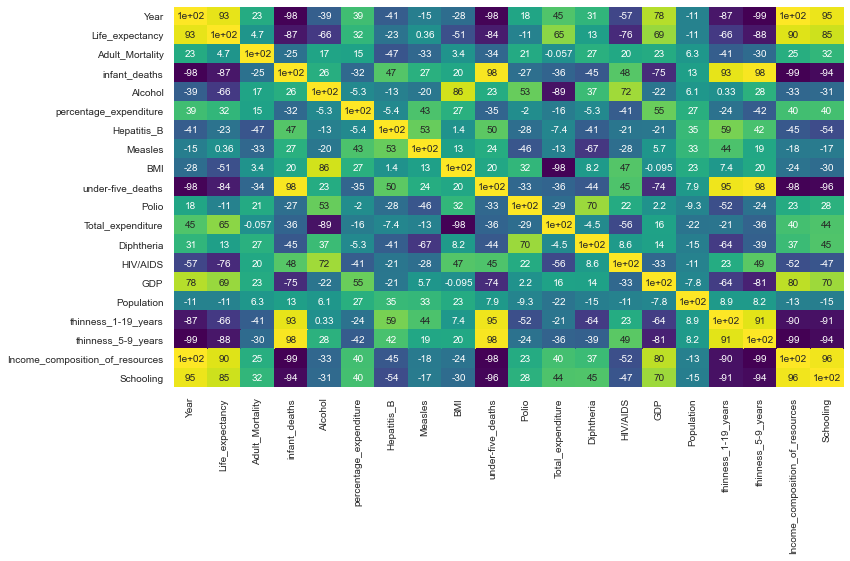

In [25]:
heatmap(df, 'Russian Federation')

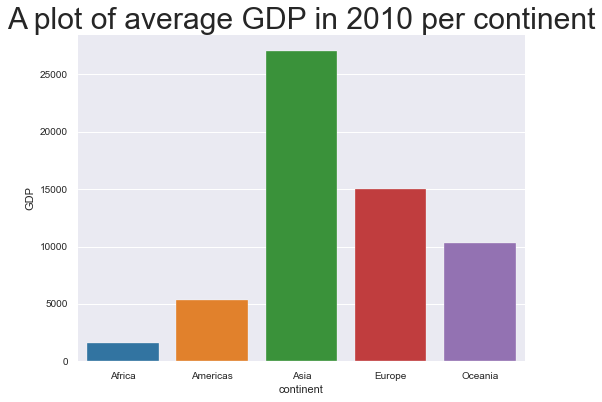

In [26]:
#Visualizing average life expectancy by continent per year
def feature_cpy(year, feature, style=None):
    global df
    plt.figure(figsize=(8,6))
    a = df.groupby(['Year','continent']).mean()
    y = a.loc[year][feature]
    x = a.loc[year].index
    if style == None:
        sns.set_style('darkgrid')
    else:
        sns.set_style(style)
    sns.barplot(x, y)
    plt.title(f'A plot of average {feature} in {year} per continent', fontsize=30)

feature_cpy(2010, 'GDP')

In [27]:
df[df['Year'] == 2015][df[df['Year'] == 2015]['GDP']>100000]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,continent
1975,Papua New Guinea,2015.0,Developing,62.9,275.0,10.0,5.0,0.0,67.0,38.0,...,73.5,73.0,0.6,3959912.80,7919825.0,1.3,1.3,0.515,10.0,Oceania
2537,Syrian Arab Republic,2015.0,Developing,64.5,293.0,6.0,3.0,0.0,41.0,45.0,...,23.0,41.0,0.1,9367493.55,18734987.0,6.3,6.1,0.553,9.0,Asia


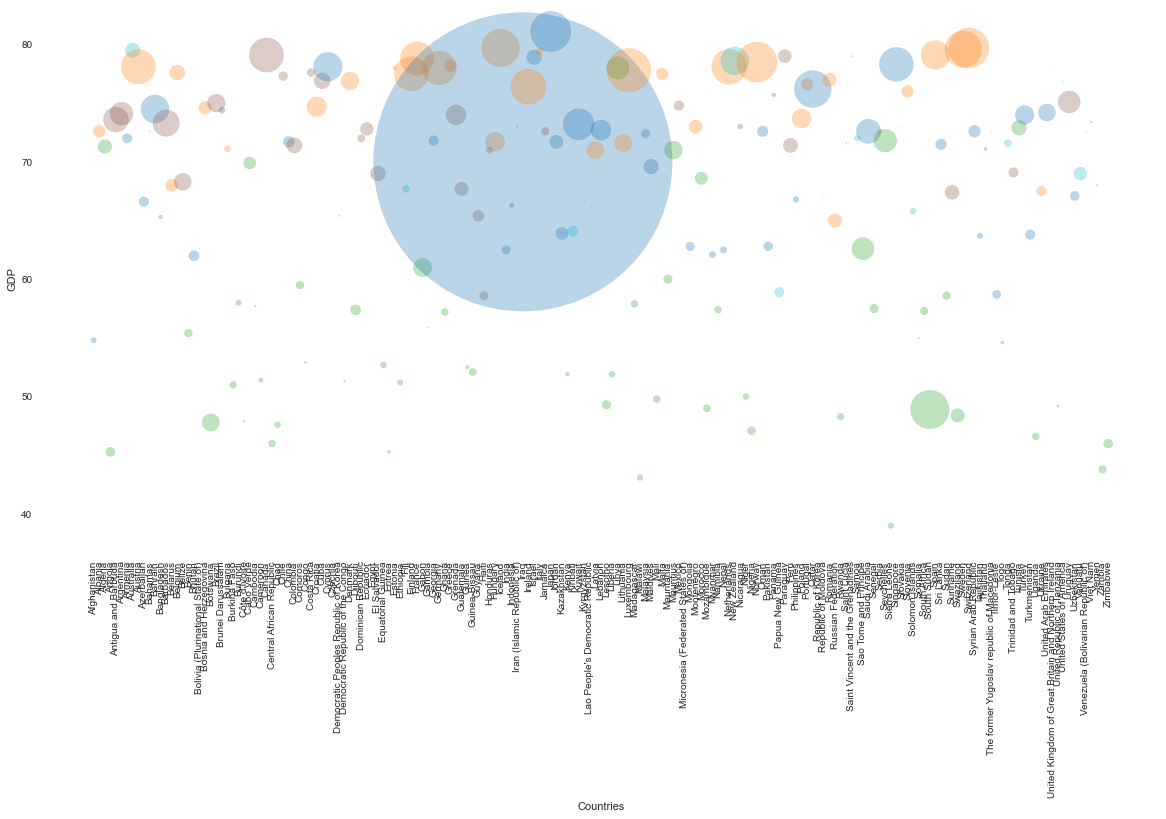

In [28]:
#Plan to make this more interactive using Bokeh

plt.figure(figsize=(20,10))
x = df[df['Year'] == 2000]['Country']
y = df[df['Year'] == 2000]['Life_expectancy']
s = df[df['Year'] == 2000]['GDP']
cmap = df[df['Year'] == 2000]['continent']
a = []
for i in list(cmap):
    a.append(list(cmap).index(i))
sns.set_style('white')
plt.scatter(x,y, s=s**0.7, alpha=0.3, c=a, cmap='tab10')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('GDP');
#plt.legend('tab10', list(cmap.value_counts().index))

----------------

In [29]:
def plot(data, col, x_val, y_val, specific, save=False, save_name=None):
    '''Take in 5 argument
    data : dataframe containing the data
    col : categorical column in the dataset
    x_val : the value to be on the x axis of the plot
    y_val : the value to be on the y axis of the plot
    specific :  the category in the categorical column to be specialized on
    save(optional) : Boolean, determines if the plot should be saved to file or not
    save_name(depend on save) : if save is True, then save_name must be entered'''
    plt.grid(True)
    df = data[data[col] == specific]
    x = df[x_val]
    y = df[y_val]
    plt.plot(x, y, linestyle = '--')
    plt.scatter(x, y, c='r', marker='x')
    plt.xlabel(x_val)
    plt.ylabel(y_val)
    plt.title(f'{x_val} against {y_val} ({specific})', fontsize=20)
    if save:
        plt.savefig(save_name)   
    plt.show()

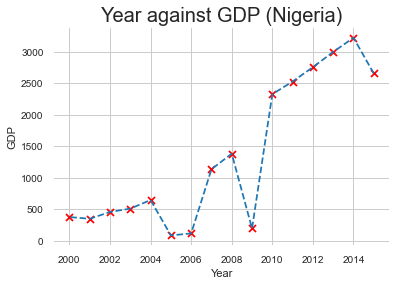

In [30]:
plot(df,'Country', 'Year', 'GDP','Nigeria')#, save=True, save_name='ife')

In [31]:
df['Life_expectancy'].max()

89.0

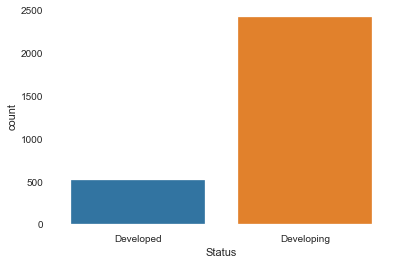

In [32]:
sns.countplot(x='Status', data=df)

We have a bias in the Status column as we have more Developing countries than Developed countrties

In [33]:
#report = ProfileReport(df)
#report.to_widgets()

Text(0.5, 1.0, 'Country v GDP')

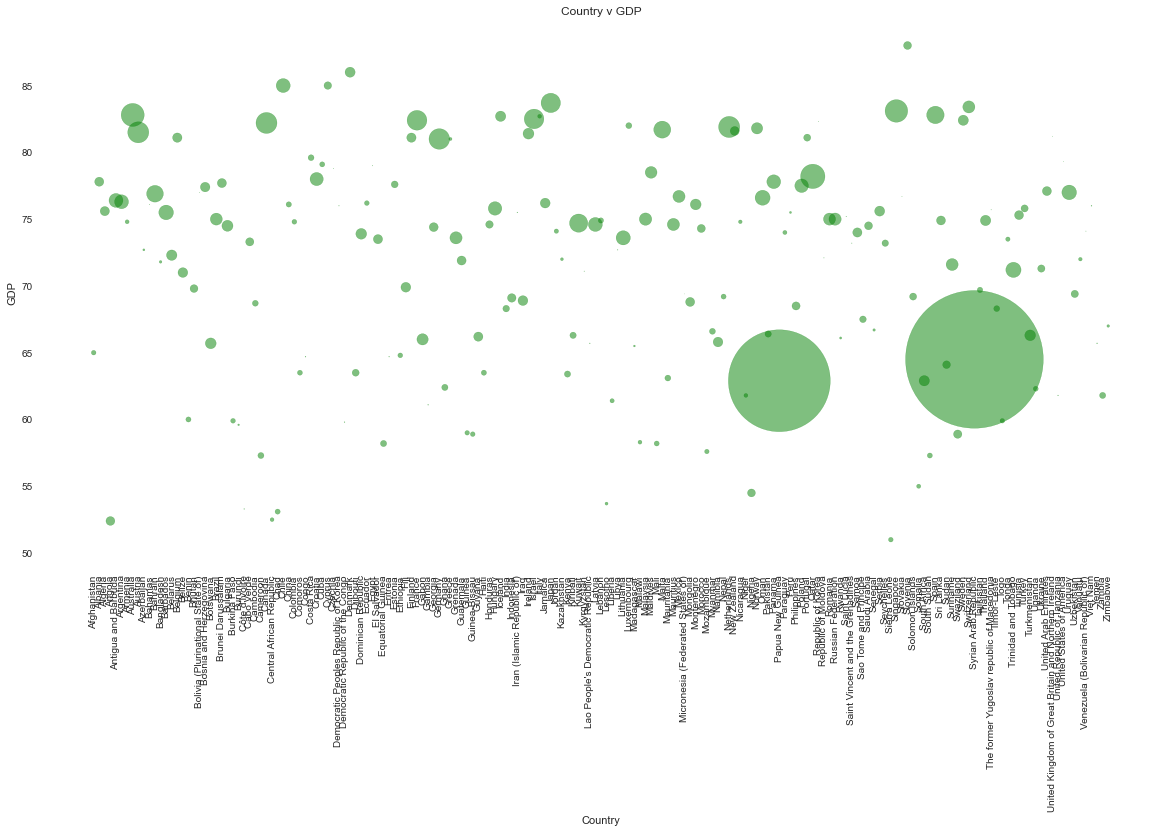

In [34]:
dd = df[df['Year']==2015]
dd.reset_index(drop=True, inplace=True)
plt.figure(figsize=(20,10))
plt.scatter(x=dd.Country, y=dd['Life_expectancy'], alpha=0.5, marker='.', c='g', s=dd['GDP']**0.7)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation = 90)
plt.title('Country v GDP')

In [35]:
from sklearn.preprocessing import Normalizer

df['avg_child_dr'] = df['under-five_deaths']/2 + df['infant_deaths']/2
df['avg_thinness'] = (df['thinness_1-19_years'] + df['thinness_5-9_years'])/2

df.drop(axis=1, columns=['thinness_1-19_years', 'thinness_5-9_years'], inplace=True)#, 'under-five_deaths',
                        #'infant_deaths'], inplace=True)

num_col = list(df.select_dtypes(include=['float64', 'int64']).columns)
num_col.remove('Year')
num_col.remove('Life_expectancy')
norm = Normalizer()
df[num_col] = norm.fit_transform(df[num_col])

In [36]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,continent,avg_child_dr,avg_thinness
0,Afghanistan,2015.0,Developing,65.0,0.000008,0.000002,2.964149e-10,0.000002,0.000002,0.000034,...,2.418746e-07,0.000002,2.964149e-09,0.000017,1.000000,1.419827e-08,2.993791e-07,Asia,0.000002,5.113157e-07
1,Afghanistan,2014.0,Developing,59.9,0.000827,0.000195,3.052660e-08,0.000224,0.000189,0.001502,...,2.497076e-05,0.000189,3.052660e-07,0.001870,0.999997,1.453066e-06,3.052660e-05,Asia,0.000229,5.342156e-05
2,Afghanistan,2013.0,Developing,59.9,0.000008,0.000002,3.151424e-10,0.000002,0.000002,0.000014,...,2.562108e-07,0.000002,3.151424e-09,0.000020,1.000000,1.481169e-08,3.119910e-07,Asia,0.000002,5.578020e-07
3,Afghanistan,2012.0,Developing,59.5,0.000074,0.000019,2.704926e-09,0.000021,0.000018,0.000754,...,2.304597e-06,0.000018,2.704926e-08,0.000181,1.000000,1.252381e-07,2.650827e-06,Asia,0.000022,4.855342e-06
4,Afghanistan,2011.0,Developing,59.2,0.000092,0.000024,3.357281e-09,0.000002,0.000023,0.001012,...,2.642180e-06,0.000023,3.357281e-08,0.000021,0.999999,1.524206e-07,3.189417e-06,Asia,0.000028,6.110252e-06


In [37]:
#report = ProfileReport(df)
#report.to_widgets()

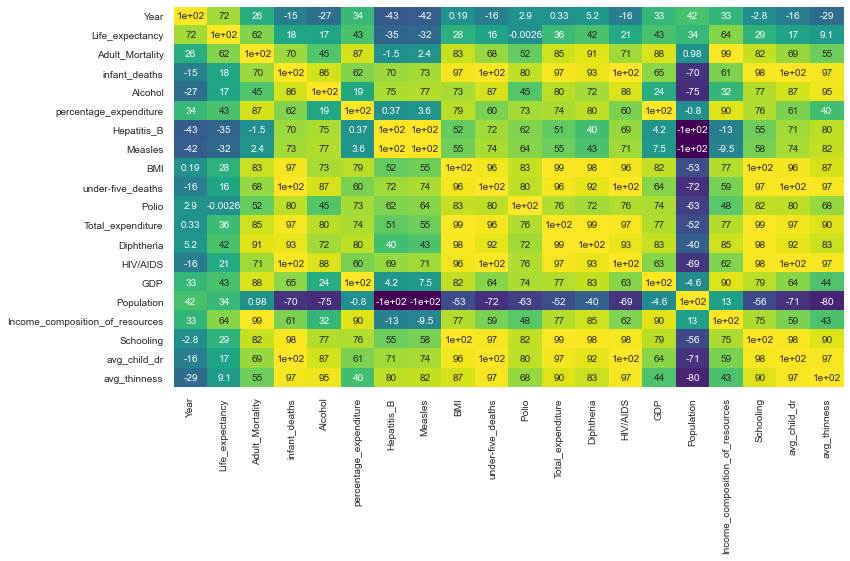

In [38]:
heatmap(df, 'Nigeria')

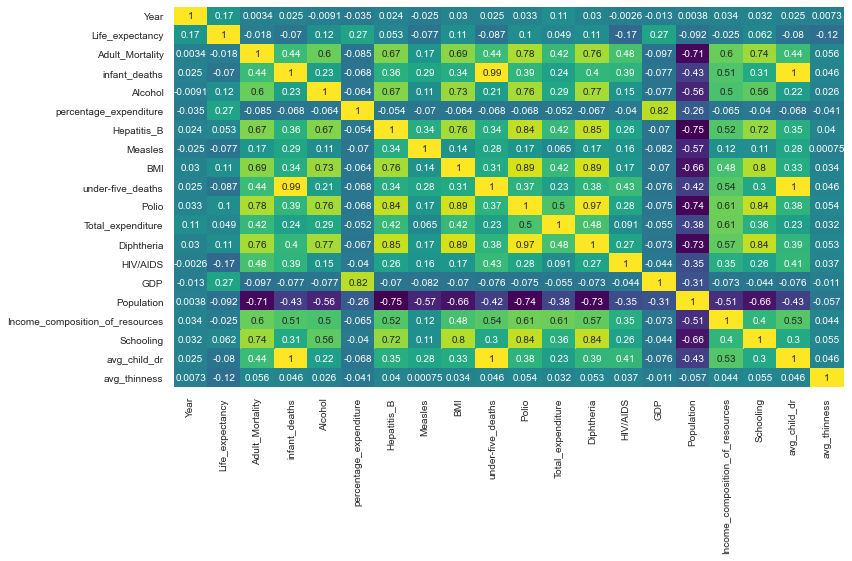

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True, cbar=False, cmap = 'viridis')

In [40]:
df = pd.get_dummies(df, drop_first=True, columns=['Status', 'continent'])
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling', 'avg_child_dr',
       'avg_thinness', 'Status_Developing', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania'],
      dtype='object')

In [41]:
#Run this cell only once

dff = df.copy()
def linear(dff, country=None):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    lr = LinearRegression()
    if country == None:
        pass
    else:
        dff = dff[dff['Country']==country]
    dff = dff.drop(axis=1, columns='Country')
    ttest = dff[dff['Year']==2015]
    train = dff.drop(ttest.index)
    X_test = ttest.drop(axis=1, columns='Life_expectancy')
    y_test = ttest['Life_expectancy']

    X_train = train.drop(axis=1, columns='Life_expectancy')
    y_train = train['Life_expectancy']
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r_score = r2_score(y_test, pred)
    sns.distplot((y_test-pred),bins=50)
    plt.show()
    plt.scatter(y_test,pred)
    plt.xlabel('orig')
    plt.ylabel('pred')
    plt.show()
    coeff_dff = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coefficient'])
    print(f'{coeff_dff} \n \n \n')
    print(f'pred_min  : {pred.min()} \n pred_max : {pred.max()}')
    print(f'mean abs error : {mae} \n mean squared error : {mse} \n r2_score : {r_score}')

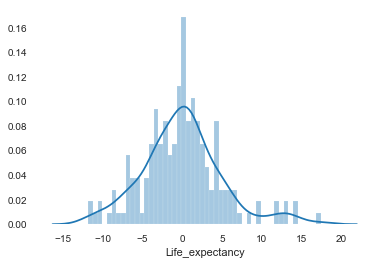

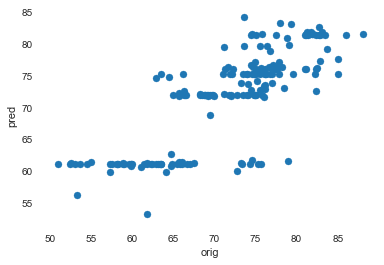

                                 Coefficient
Year                                0.358028
Adult_Mortality                     1.841848
infant_deaths                     214.366291
Alcohol                           -30.789886
percentage_expenditure             10.649418
Hepatitis_B                        -2.660708
Measles                             3.890288
BMI                                -8.967699
under-five_deaths                -178.584219
Polio                               9.259941
Total_expenditure                  -3.540620
Diphtheria                         10.213328
HIV/AIDS                         -133.537469
GDP                                 7.233899
Population                          3.684602
Income_composition_of_resources   -73.237552
Schooling                         -31.878176
avg_child_dr                       17.891036
avg_thinness                       -2.109875
Status_Developing                  -5.464699
continent_Americas                 14.022199
continent_

In [42]:
country = 'Russian Federation'
linear(dff)

In [43]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


In [ ]:
df = df.drop(axis=1, columns='Country')

ttest = df[df['Year']==2015]
train = df.drop(ttest.index)

X_test = ttest.drop(axis=1, columns='Life_expectancy')
y_test = ttest['Life_expectancy']

X_train = train.drop(axis=1, columns='Life_expectancy')
y_train = train['Life_expectancy']

In [ ]:
ttest = df[df['Year']==2015]
train = df.drop(ttest.index)
X_test = np.array(ttest.drop(axis=1, columns='Life_expectancy'))
y_test = np.array(ttest['Life_expectancy'])

X_train = train.drop(axis=1, columns='Life_expectancy')
y_train = train['Life_expectancy']
model = build_model()
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'mse : {val_mse} \n mae : {val_mae}')

Epoch 1/10
2745/2745 [==============================] - 5s 2ms/step - loss: 177.1848 - mae: 9.9251
Epoch 2/10
2745/2745 [==============================] - 4s 2ms/step - loss: 112.6748 - mae: 8.5600
Epoch 3/10
2745/2745 [==============================] - 4s 2ms/step - loss: 104.3222 - mae: 8.1719
Epoch 4/10
2745/2745 [==============================] - 4s 2ms/step - loss: 99.4266 - mae: 8.0432
Epoch 5/10
2745/2745 [==============================] - 4s 2ms/step - loss: 91.1416 - mae: 7.6525
Epoch 6/10
2745/2745 [==============================] - 4s 2ms/step - loss: 79.9075 - mae: 7.1117
Epoch 7/10
2745/2745 [==============================] - 4s 2ms/step - loss: 70.0914 - mae: 6.6824
Epoch 8/10
2745/2745 [==============================] - 4s 2ms/step - loss: 65.8542 - mae: 6.4282
Epoch 9/10
2745/2745 [==============================] - 4s 2ms/step - loss: 63.2801 - mae: 6.3214
Epoch 10/10
183/183 [==============================] - 0s 153us/step
mse : 27.19925307185272 
 mae : 4.120430469512

In [ ]:
import numpy as np

k = 4
num_val_samples = len(X_train) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_X_train, partial_y_train,
              epochs=num_epochs, batch_size=1, verbose=1)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)
pred=model.predict(X_test, verbose=1)
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)
sns.distplot((y_test-pred),bins=50)
plt.show()
plt.scatter(y_test,pred)
plt.xlabel('orig')
plt.ylabel('pred')
plt.show()
print(f'pred_min  : {pred.min()} \n pred_max : {pred.max()}')
print(f'mse : {val_mse} \n mae : {val_mae} \n {all_scores}')

processing fold # 0
Epoch 1/50
2059/2059 [==============================] - 4s 2ms/step - loss: 250.6413 - mae: 10.8344
Epoch 2/50
2059/2059 [==============================] - 4s 2ms/step - loss: 117.4486 - mae: 8.7288
Epoch 3/50
2059/2059 [==============================] - 4s 2ms/step - loss: 105.8110 - mae: 8.2175
Epoch 4/50
2059/2059 [==============================] - 3s 2ms/step - loss: 100.2133 - mae: 8.0273
Epoch 5/50
2059/2059 [==============================] - 3s 2ms/step - loss: 95.6533 - mae: 7.8749
Epoch 6/50
2059/2059 [==============================] - 3s 2ms/step - loss: 88.4874 - mae: 7.4098
Epoch 7/50
2059/2059 [==============================] - 3s 2ms/step - loss: 81.1628 - mae: 7.1374
Epoch 8/50
2059/2059 [==============================] - 3s 2ms/step - loss: 74.5998 - mae: 6.8356
Epoch 9/50
2059/2059 [==============================] - 3s 2ms/step - loss: 70.3295 - mae: 6.7085
Epoch 10/50
2059/2059 [==============================] - 3s 2ms/step - loss: 65.3681 - mae: 6

In [ ]:
pred=model.predict(X_test, verbose=1)
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)
sns.distplot((y_test-pred),bins=50)
plt.show()
plt.scatter(y_test,pred)
plt.xlabel('orig')
plt.ylabel('pred')
plt.show()
print(f'mse : {val_mse} \n mae : {val_mae}')

In [ ]:
all_scores

# Pheeeeeeeew

That is a lot but we can make it better, I will keep updating the notebook, so watchout!